In [1]:
import torch
from torchvision import transforms
from PIL import Image
from muse import MaskGitVQGAN
import numpy as np

2023-11-15 10:33:08.963641: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-15 10:33:08.982068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 10:33:08.982086: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 10:33:08.982101: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 10:33:08.986493: I tensorflow/core/platform/cpu_feature_g

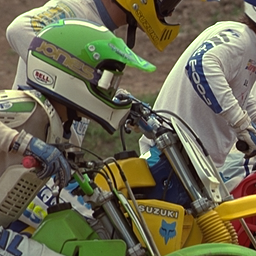

In [2]:
encode_transform = transforms.Compose(
    [
        transforms.Resize(256, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
    ]
)
image = Image.open("kodim05.png").crop((20,20,276,276)) #
pixel_values = encode_transform(image).unsqueeze(0)
image

In [3]:
vq_model = MaskGitVQGAN.from_pretrained("openMUSE/maskgit-vqgan-imagenet-f16-256")

In [4]:
image_tokens = vq_model.encode(pixel_values)
rec_image = vq_model.decode(image_tokens[0])
rec_image = 2.0 * rec_image - 1.0
rec_image = torch.clamp(rec_image, -1.0, 1.0)
rec_image = (rec_image + 1.0) / 2.0
rec_image *= 255.0
rec_image = rec_image.permute(0, 2, 3, 1).cpu().detach().numpy().astype(np.uint8)
pil_images = [Image.fromarray(image) for image in rec_image]

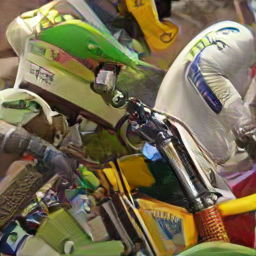

In [5]:
pil_images[0]

In [6]:
256*256*24/(256*10)

614.4

In [7]:
image_tokens[1].shape

torch.Size([1, 256])

In [8]:
image_tokens[1]

tensor([[ 988,   57,  476,  246,  921,  706,  524,  250,  788,  339,  188,  973,
          452,  503,  814,  921,  191,  995,  965,  246,   43,  295,  175,  922,
          389,  499,  997,   21,  388,  933,  174,  347,  814,  394,  180,  758,
          309,  854,  131,  890,  438,  295,   80,  546,  261,  699,  995,  404,
          618,  612,  758,  202,  438,  359,  189,  737,  708,  630,  467,   45,
          469,  856,  363,   14,  301,  462,  920,  174,  119,  296,  969,  436,
          856,  379,  191,  400,  675,   64,  880,  498,  476,  233,  789,   17,
          901,  375,  121,  914,  760,  398,   53,  814,  541,  982,  699,  507,
           58,  788,   76,  876,  544,  973,  941,  322,  818,  932,  769,  783,
          921,  402,  212,  592,  765,  467,  659,  324,  455,  104,  156,  605,
          580,  755,  861,  921,  690,  303,  680,  680,  341,  122,  819,   23,
          363,  590, 1016,  859,  842,  961,  932,  472,  706,  917,  464,  869,
          459,  431,  282,  